In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

% matplotlib inline

In [3]:
# Example of multiplying a placeholder by 2
# And also the use of None as a dimension
x = tf.placeholder("float", [None, 3])
y = x * 2

with tf.Session() as sess:
    result = sess.run(y, feed_dict={x: [[1, 2, 3],[4, 5, 6],]})
    print(result)

[[  2.   4.   6.]
 [  8.  10.  12.]]


(3000, 2685, 3)


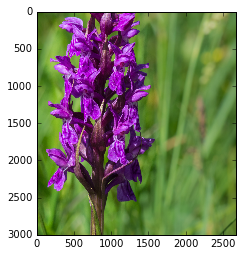

In [10]:
# Now load image from previous tutorial
file = "MarshOrchid.jpg"
image = mpimg.imread(file)

# Define a placeholder to hold an image 
# (We know this is 3 colours deep hence the 3rd dimension can be fixed) 
image_ph = tf.placeholder("uint8", [None, None, 3])

# Here we use the TensorFlow function slice to extract a slice from the image
slice = tf.slice(image_ph, [1000,1000, 0], [3000, -1, -1])

# As before...
with tf.Session() as sess:
    result = sess.run(slice, feed_dict={image_ph: image})
    print(result.shape)

plt.imshow(result)
plt.show()

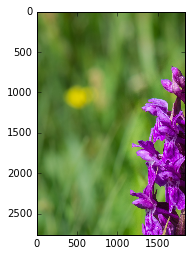

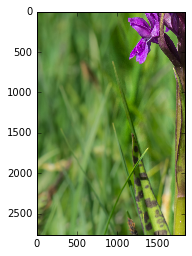

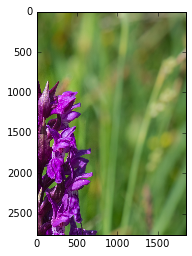

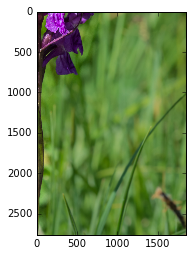

In [14]:
# Here I use the tf.slice function to break the image apart into four corners


file = "MarshOrchid.jpg"
image = mpimg.imread(file)

height, width, depth = image.shape

image_ph = tf.placeholder("uint8", [None, None, 3])

slice = tf.slice(image_ph, [0, 0, 0], [round(height/2), round(width/2), -1])
slice1 = tf.slice(image_ph, [round(height/2), 0, 0], [-1, round(width/2), -1])
slice2 = tf.slice(image_ph, [0, round(width/2), 0], [round(height/2), -1, -1])
slice3 = tf.slice(image_ph, [round(height/2), round(width/2), 0], [-1, -1, -1])

with tf.Session() as sess:
    result = sess.run(slice, feed_dict={image_ph: image})
    result1 = sess.run(slice1, feed_dict={image_ph: image})
    result2 = sess.run(slice2, feed_dict={image_ph: image})
    result3 = sess.run(slice3, feed_dict={image_ph: image})
    

plt.imshow(result)
plt.show()
plt.imshow(result1)
plt.show()
plt.imshow(result2)
plt.show()
plt.imshow(result3)
plt.show()

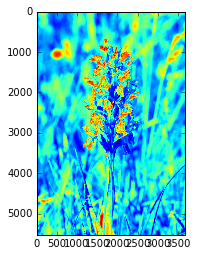

In [35]:
# Now take a slice of the colour

file = "MarshOrchid.jpg"
image = mpimg.imread(file)

image_ph = tf.placeholder("uint8", [None, None, 3])

slice = tf.slice(image_ph, [0, 0, 0], [-1, -1, 1])

with tf.Session() as sess:
    result = sess.run(slice, feed_dict={image_ph: image})
    result = np.squeeze(result, 2)

plt.imshow(result)
plt.show()